Jarod Boone

In [1]:
%matplotlib inline 
import numpy as np # math library 
from matplotlib import pyplot as plt # plotting library

## Problem 1 
**a)** compute the fourier transform of the single sided exponential function given by: 

$$ g(t) = \begin{cases} 0 \quad &t < 0\\ e^{-\beta t} \quad &t > 0 \end{cases}$$

Or more succinctly $g(t) = e^{-\beta t} \cdot \Theta(t)$ where $\Theta(t)$ is the unit step function. 

The fourier transform of a function $g(t)$ is defined as follows 

$$ F(g(t)) = G(f) = \int_{-\infty}^{\infty} g(t) e^{-j2\pi t f} dt$$

Solving this for the function $g(t)$ given we have 

$$ \int_{-\infty}^{\infty}  e^{-\beta t} \cdot \Theta(t) \cdot e^{-j t\omega} dt = \int_{0}^{\infty} e^{-\beta t} e^{-j t\omega} dt = \int_{0}^{\infty} e^{-t(j\omega + \beta)} dt = \int_{0}^{\infty} e^{-t(\alpha)} dt$$

With $\omega = 2\pi f$ and some imaginary number $\alpha(\omega) = j\omega + \beta$. This integral converges according to the rule $\int e^{a\cdot x} dx = \frac{1}{a} e^{a \cdot x} + C$ for some $a$ that is constant in regard to the variable of integration. Thus we have 

$$ \int_{0}^{\infty} e^{-t(\alpha)} dt = (-1) \cdot \frac{1}{\alpha} e^{\alpha \cdot t} \enspace\big\vert_{0}^{\infty} = \frac{1}{\alpha} = \frac{1}{j\omega + \beta} $$

Below I plot the fourier transform pair (modeled without loss of generality for $\beta = 2$) and see that the fourier transform of a one-sided decaying exponential is a complex lorentzian. 


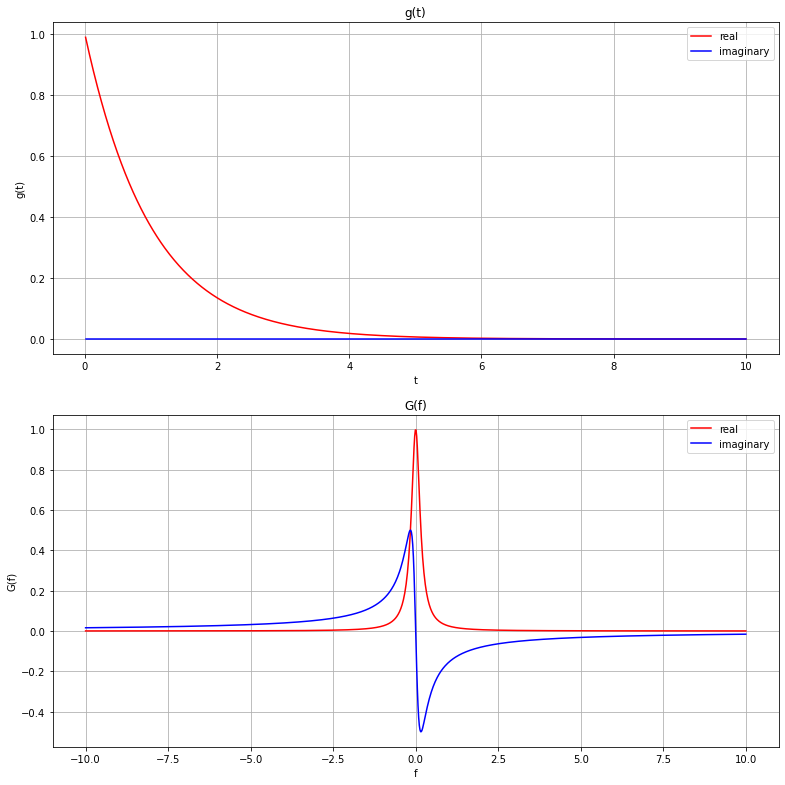

In [2]:
beta = 1

# function modeling g(t)
def g(t): 
    if t > 0 : 
        return np.exp(-beta * t)
    else : 
        return 0

# function modeling G(f)
def G(f): 
    return (1/((2j * np.pi * f) + beta))

time_domain = np.linspace(0.01,10,1000)
freq_domain = np.linspace(-10,10,1000)

# Real and imaginary sample vectors of g(t) for t in (0,10]
real_gt = list(map(lambda x : x.real, list(map(g,time_domain))))
imag_gt = list(map(lambda x : x.imag, list(map(g,time_domain))))

# Real and imaginary sample vectors of G(f) for f in [-10,10]
real_Gf = list(map(lambda x : x.real, list(map(G,freq_domain))))
imag_Gf = list(map(lambda x : x.imag, list(map(G,freq_domain))))

# Create a figure with 2 plots on it 
fig, axs = plt.subplots(2,constrained_layout=True)

# Resize the figure 
fig.set_figheight(10.8)
fig.set_figwidth(10.8)

# Target the two axes
time_ax = axs[0]
freq_ax = axs[1]

# Set up time axes 
time_ax.plot(time_domain,real_gt,'r-',time_domain,imag_gt,'b-')
time_ax.grid()
time_ax.legend(['real','imaginary'])
time_ax.set_xlabel('t')
time_ax.set_ylabel('g(t)')
time_ax.set_title('g(t)')

# Set up frequency axes 
freq_ax.plot(freq_domain,real_Gf,'r-',freq_domain,imag_Gf,'b-')
freq_ax.grid()
freq_ax.legend(['real','imaginary'])
freq_ax.set_xlabel('f')
freq_ax.set_ylabel('G(f)')
freq_ax.set_title('G(f)')

plt.show()

**b)** If we multiply $g(t)$ by a sinusoid at some frequency $\omega_0 = 2\pi \cdot f_0$ we get 

$$ g_2(t) = e^{-\beta t} \cdot \Theta(t) \cdot \cos \omega_0 t $$

Which is the function of a decaying sinusoid. Rather than taking the fourier transform of $g_2(t)$ we can use the following property: 

$$ h(x) \cdot f(x) = \frac{1}{2\pi}H(f)\ast F(f) $$

Along with the known fact that the fourier transform of a sinusoid is a set of  two dirac delta functions symmetric about the y-axis and shifted by the frequency of the sinusouid. More specifically 

$$\mathcal{F}\{\cos2\pi f_0 t\} = \frac{1}{2}[\delta(f - f_0) + \delta(f- f_0)]$$

Therefore we can intuit the fourier transform of $g_2(t)$ as such 

$$\mathcal{F}\{g_2(t)\} = G_2(f) = \mathcal{F}\{g(t) \cdot \cos 2\pi f_0 t \} =  \frac{1}{2\pi}(\frac{1}{j2\pi f + \beta}\ast \frac{1}{2}[\delta(f - f_0) + \delta(f- f_0)]) = \frac{1}{4\pi}(\frac{1}{j\pi f + \beta/2}\ast [\delta(f - f_0) + \delta f- f_0)])$$

And finally applying the sifting property of convolution with delta functions we obtain

$$\frac{1}{4\pi}(\frac{1}{j\pi f + \beta/2}\ast [\delta(f - f_0) + \delta f- f_0)]) = \frac{1}{4\pi}(\frac{1}{j\pi (f - f_0) + \beta/2} + \frac{1}{j\pi (f +f_0) + \beta/2})$$

Below, again I model the fourier transform pair $g_2(t)$ and $G_2(f)$ for $\beta = 2$ and $f_0 = 4 \enspace [Hz]$ without loss of generality. I see that it is just two time shifted complex lorentzians, almost like a dispersion vs refractive index plot.

This is akin to sying that anomalous dispersion occurs for the frequeny $f_0$. Thus I'm inclined to say that the dispersion of a material is modeled by multiplying a dome kind of decaying exponential with a sinusouid of resonant frequency. 

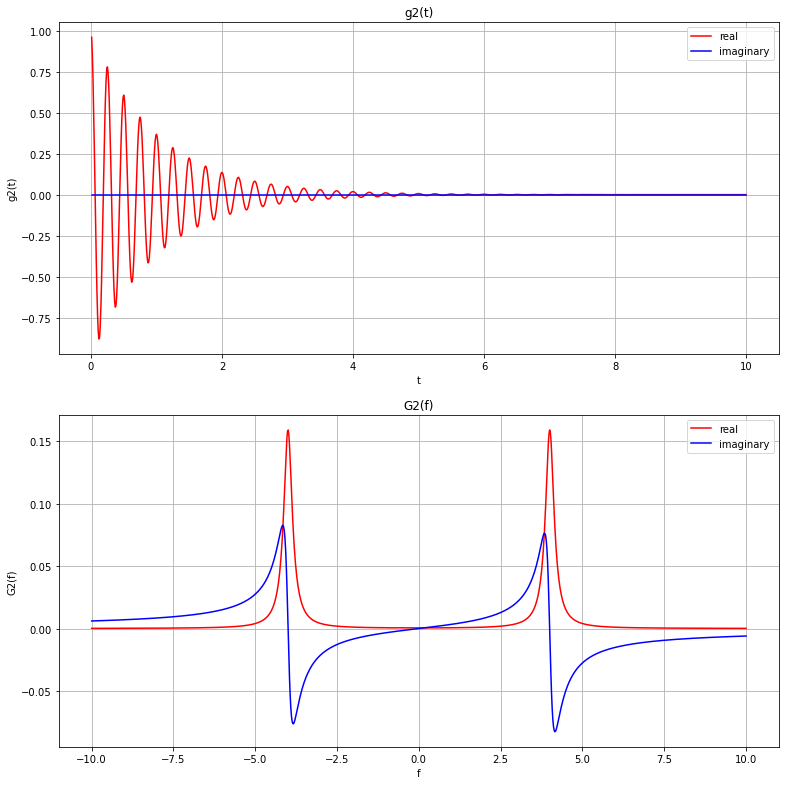

In [3]:
f0 = 4

# function modeling g2(t)
def g_2(t): 
    return np.cos(f0 * 2 * np.pi * t) * g(t)

# function modeling G2(f)
def G_2(f): 
    return ((1/(np.pi * 4)) * (1/(1j*np.pi*(f - f0) + beta/2) + 1/(1j*np.pi*(f + f0) + beta/2)))

time_domain = np.linspace(0.01,10,1000)
freq_domain = np.linspace(-10,10,1000)

# Real and imaginary sample vectors of g(t) for t in (0,10]
real_gt = list(map(lambda x : x.real, list(map(g_2,time_domain))))
imag_gt = list(map(lambda x : x.imag, list(map(g_2,time_domain))))

# Real and imaginary sample vectors of G(f) for f in [-10,10]
real_Gf = list(map(lambda x : x.real, list(map(G_2,freq_domain))))
imag_Gf = list(map(lambda x : x.imag, list(map(G_2,freq_domain))))

# Create a figure with 2 plots on it 
fig, axs = plt.subplots(2,constrained_layout=True)

# Resize the figure 
fig.set_figheight(10.8)
fig.set_figwidth(10.8)

# Target the two axes
time_ax = axs[0]
freq_ax = axs[1]

# Set up time axes 
time_ax.plot(time_domain,real_gt,'r-',time_domain,imag_gt,'b-')
time_ax.grid()
time_ax.legend(['real','imaginary'])
time_ax.set_xlabel('t')
time_ax.set_ylabel('g2(t)')
time_ax.set_title('g2(t)')

# Set up frequency axes 
freq_ax.plot(freq_domain,real_Gf,'r-',freq_domain,imag_Gf,'b-')
freq_ax.grid()
freq_ax.legend(['real','imaginary'])
freq_ax.set_xlabel('f')
freq_ax.set_ylabel('G2(f)')
freq_ax.set_title('G2(f)')

plt.show()

## Problem 2

For the refractive index of a metal at very high frequencies ($\omega >> \Gamma$) we derived the following equation in regard to the plasma frequency $\omega_p$ 

$$ n(\omega) = \sqrt{1 - \frac{\omega_p}{\omega}} $$

**a)**  Using this result we can derive an expression for the phase velocity $v_{\phi}(\omega)$

$$v_{\phi}(\omega)= \frac{c_0}{n(\omega)} = \frac{c_0}{\sqrt{1 - \frac{\omega_p}{\omega}}}$$

Similarly we can use the derivitave with regard to frequency for the refractive index at frequencies above the plasma to derive an expression for the group velocity $v_g(\omega)$

$$\frac{dn(\omega)}{d\omega} = \frac{\omega_p}{2\omega^2 \cdot \sqrt{1 - \frac{\omega_p}{\omega}}} \implies v_g(\omega) = \frac{c_0}{n(\omega) + \omega\cdot \frac{dn(\omega)}{d\omega}} = \frac{c_0}{\sqrt{1 - \frac{\omega_p}{\omega}} + \frac{\omega_p}{2\omega \cdot \sqrt{1 - \frac{\omega_p}{\omega}}}} $$

The product of $v_g(\omega)$ and $v_{\phi}(\omega)$ is then simply the speed of light squared 

$$v_g(\omega) \cdot v_{\phi}(\omega) = \frac{c_0}{\sqrt{1 - \frac{\omega_p}{\omega}} +  \frac{\omega_p}{2\omega \cdot \sqrt{1 - \frac{\omega_p}{\omega}}}} \cdot \frac{c_0}{\sqrt{1 - \frac{\omega_p}{\omega}}} = \frac{c_0^2}{1 - \frac{\omega_p}{\omega} + \frac{\omega_p}{2\omega }}  = c_0^2$$

**b)** No information is not travelling faster than $c_0$, Einstien was quite smart and would probably not have missed such an obvious phenomena! 

What is happening in the case where $\omega > \omega_p$ for a light wave propagating through a metal is that the frequeny information is propagating faster than $c_0$ because of how easily the electrons can move. Thephase velocity $v_{\phi}$ goes faster than $c_0$ but as said in class just frequency content cannot yield information, we need a pulse or superposition of multiple frequencies. Pulses travel at the group speed $v_g$ which is never faster than $c_0$ except in anomylous dispersion.

In fact, we see from the relationship $v_g \cdot v_{\phi} = c_0$ that if $v_{\phi}$ is faster than the speed of light that $v_g$ must be slower and vice versa.

## Problem 3 
**a)** A simple expansion of $v_g$ in regard to the free space wavelength shows that the group velocity dispersion is porportional to the second derivative of the refractive index

$$GVD = \frac{d}{d\lambda_0}(\frac{1}{v_g(\lambda_0)}) = \frac{d}{d\lambda_0}(\frac{n(\lambda_0) + \lambda_0\cdot \frac{dn(\lambda_0)}{d\lambda_0}}{c_0}) = \frac{1}{c_0} \cdot (\frac{2 \cdot dn(\lambda_0)}{d\lambda_0} + \frac{\lambda_0 \cdot d^2n(\lambda_0)}{d\lambda_0^2})$$

**b)** Consider some fiber optic material with a refractive index given by $n(\lambda_0) = A - B\lambda_0^2 + \frac{B}{\lambda_0^2}$ with $A = 1.451$ and $B = 0.003$. Computing the necessary values of the first and second derivatives yields as follows

$$\frac{dn(\lambda_0)}{d\lambda_0} = \frac{-0.000018}{\lambda_0^3} - 0.000018\lambda_0$$ 

$$\frac{d^2n(\lambda_0)}{d\lambda_0^2} = \frac{0.000054}{\lambda_0^4} - 0.000018$$

Now taking the group velocity dispersion of the fiber optic material via the expression derived in part **a)**

$$GVD = \frac{1}{c_0} (\frac{-0.000036}{\lambda_0^3} - 0.000036\lambda_0 + \frac{0.000054}{\lambda_0^3} - 0.000018\lambda_0)= \frac{\lambda_0}{c_0} \cdot (\frac{0.000036}{\lambda_0^4} - 0.000054)$$

This expression is zero at $\lambda_0 = 0.9032 [\mu m]$ or 900 nanometers which is somewhere near infared


## Problem 4 

Considering some plane wave propagating in the $z$ direction defined by the equation $E(\hat{r}) = E_0e^{jk_0z}$ we take a small modulation in the $x direction to be defined as 

$$ E_{mod}(\hat{r}) = E_0[1 + \eta \cos(\beta x)]e^{jk_0z} $$

Rewriting this equation with cosine expanded according to the euler identity we see that it is the superposition of two additional plane waves onto $E(\hat{r})$

$$ E_0[1 + \eta \cos(\beta x)]e^{jk_0z} = E_0e^{jk_0z} + E_0e^{jk_0z} \eta \cos(\beta x) = E(\hat{r}) + E_0e^{jk_0z} \frac{\eta}{2} \cdot (e^{j\beta x} + e^{-j\beta x})$$

From arithmetic and knowledge that the k vector is dotted with the components of $\hat{r}$ in the spatial component of the phase we have 

$$E_0e^{jk_0z} \frac{\eta}{2} \cdot (e^{j\beta x} + e^{-j\beta x}) = E_0 \frac{\eta}{2} (\cdot e^{j(\beta x + k_0z)} + e^{j(k_0z - \beta x)}) = E_1(\hat{r}) + E_2(\hat{r})$$

Where $E_1(\hat{r}) = E_0 \frac{\eta}{2} e^{j(k_1 \cdot \hat{r})} $ and $E_2(\hat{r}) = E_0 \frac{\eta}{2} e^{j(k_2 \cdot \hat{r})} $ with $k_1$ and $k_2$ beinf k vectors with $k_0$ in the z component an positive or negative $\beta$ in the x component respectively. We then have 

$$ E_{mod}(\hat{r}) = E(\hat{r}) + E_1(\hat{r}) + E_2(\hat{r})$$ 

As needed. We can find the angle between the k vectors in the xz plane with the vector angle formula. More specifically for two vectors $\hat{u}$ and $\hat{v}$ with an angle between them $\Theta$ it holds that

$$ \cos\Theta = \frac{\hat{u} \cdot \hat{v}}{|\hat{u}| \cdot |\hat{v}|}$$

Thus the angle between $k_0$ and $k_1$ or $k_2$ is 

$$ \frac{k_0}{\sqrt{k_0^2 + \beta^2} \cdot k_0} =  \frac{1}{\sqrt{k_0^2 + \beta^2}} \implies \theta = \cos^{-1}(\frac{1}{\sqrt{k_0^2 + \beta^2}})$$

Since $k_0$ is entirely in the z direction this is the angle of propagation of $ E_1(\hat{r})$ and $E_2(\hat{r})$ relative to the z axis in either direction (positive for $ E_1(\hat{r})$ and negative for $ E_2(\hat{r})$)





## Problem 5 

**a)** A rectangular pulse of $h$ unity and width $\Delta t$ will have a fourier transform that is a sinc given by $$\Delta t h\cdot \frac{\sin(\frac{\Delta t \omega}{2\pi})}{\frac{\Delta t \omega}{2}} $$. Instead of solving the equation I simply observe that a rectangular pulse is not bandwidth limited and therefore must have a time bandwidth product of 1

**b)** Spectral width of $700 [nm]$ ro $1000 [nm]$ or for frequency $4.2 \cdot 10^{14}$ to $3 \cdot 10^{14}$ Thus the width of the spectrum is about $1.2 \cdot 10^{14}$ and using the uncertainty principle equation (time bandwidth product is equal to 1) we have that the shortest width could only be 12 femtoseconds which is about 252 percent error... yikes 

**c)** FThe minimum time bandwith product is about 0.44 for a gaussian pulse so given that the shortest pulse would be about 3.7 femtoseconds which is only 8 percent error! 